# Deep Neural Networks (DNN)

In [1]:
# Original dataset
# http://download.tensorflow.org/example_images/flower_photos.tgz 

# Download tiny version of the dataset from VisionCog website
# After download and unzip, remember to comment the following two lines. 

! wget https://www.visioncog.com/rpk/tiny_FR.zip
! unzip tiny_FR.zip

--2020-07-22 14:09:13--  https://www.visioncog.com/rpk/tiny_FR.zip
Resolving www.visioncog.com (www.visioncog.com)... 103.21.58.10
Connecting to www.visioncog.com (www.visioncog.com)|103.21.58.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35283693 (34M) [application/zip]
Saving to: ‘tiny_FR.zip’

tiny_FR.zip         100%[===================>]  33.65M  6.21MB/s    in 5.7s    

2020-07-22 14:09:20 (5.93 MB/s) - ‘tiny_FR.zip’ saved [35283693/35283693]

Archive:  tiny_FR.zip
   creating: tiny_FR/
   creating: tiny_FR/daisy/
  inflating: tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: tiny_FR/daisy/11642632_1e7627a2cc.jpg  
 

# Flower Classification

In [2]:
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.2.0


In [3]:
imgFiles = glob.glob("tiny_FR/*/*.jpg")# Use glob to access the file paths of all images

for items in imgFiles[:5]:
  print(items)

tiny_FR/daisy/721595842_bacd80a6ac.jpg
tiny_FR/daisy/1355787476_32e9f2a30b.jpg
tiny_FR/daisy/488202750_c420cbce61.jpg
tiny_FR/daisy/11642632_1e7627a2cc.jpg
tiny_FR/daisy/512477177_d9004cbcf1_n.jpg


In [5]:
X = []
y = []

for fName in imgFiles:
  X_i = Image.open(fName)
  X_i = X_i.resize((299,299))
  X_i = np.array(X_i) / 255.0
  X.append(X_i)
  label = fName.split("/")
  y_i = label[1]
  y.append(y_i)
    
    # Prepare the dataset and populate X and y
 

In [6]:
print(set(y))

{'daisy', 'sunflower', 'dandelion', 'tulip', 'rose'}


In [8]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)# Transform the string labels to numeric labels

print(set(y))
print(lEncoder.classes_)

{0, 1, 2, 3, 4}
['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [9]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(500, 299, 299, 3)
(500,)


## Splitting data to 80% training and 20% testing 

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing.
# Make stratified split of the data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42 )# Pass appropriate arguments)

print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (400, 299, 299, 3)
X_test_shape: (100, 299, 299, 3)


In [13]:
# Manually Standard-Scale the data

mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std # Apply feature scaling to X_train
X_test_std = (X_test-mu)/std# Apply feature scaling to X_test

## Construct the network

In [16]:
# Create the network using Functional API method
# The first hidden layer should contain 1000 neurons,
# Second hidden layer should contain 100 neurons.

input_ = keras.layers.Input(shape = X_train.shape[1:])

x = keras.layers.Flatten()(input_)# Add the flatten layer
x = keras.layers.Dense(units=1000, activation='relu')(x)# Add first hidden layer with 1000 units
x = keras.layers.Dense(units=100, activation='relu')(x)# Add second hidden layer with 100 units

# Put appropriate units and activation to the output layer
output_ = keras.layers.Dense(units=5, activation='softmax' )(x)

# How the inputs and outputs arguments should be passed?
model_DNN = keras.models.Model(inputs=[input_], outputs=[output_])

In [17]:
model_DNN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 268203)            0         
_________________________________________________________________
dense (Dense)                (None, 1000)              268204000 
_________________________________________________________________
dense_1 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 268,304,605
Trainable params: 268,304,605
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network


In [18]:
# Set the appropriate options to compile the network
model_DNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

# Set x, y, number of epochs, validation percentage and batch size 
history_DNN = model_DNN.fit(x=X_train, 
                            y=y_train, 
                            epochs=25, 
                            validation_split=0.1, 
                            batch_size=16 )

Epoch 1/25
23/23 [==============================] - 3s 133ms/step - loss: 123.7806 - accuracy: 0.1917 - val_loss: 29.3957 - val_accuracy: 0.2500
Epoch 2/25
23/23 [==============================] - 3s 119ms/step - loss: 15.8239 - accuracy: 0.3861 - val_loss: 11.9878 - val_accuracy: 0.3250
Epoch 3/25
23/23 [==============================] - 3s 118ms/step - loss: 6.5022 - accuracy: 0.5361 - val_loss: 8.0171 - val_accuracy: 0.2750
Epoch 4/25
23/23 [==============================] - 3s 119ms/step - loss: 6.2956 - accuracy: 0.5833 - val_loss: 9.8122 - val_accuracy: 0.3250
Epoch 5/25
23/23 [==============================] - 3s 119ms/step - loss: 7.2035 - accuracy: 0.5583 - val_loss: 16.4231 - val_accuracy: 0.2750
Epoch 6/25
23/23 [==============================] - 3s 120ms/step - loss: 14.4919 - accuracy: 0.4556 - val_loss: 26.9790 - val_accuracy: 0.2000
Epoch 7/25
23/23 [==============================] - 3s 119ms/step - loss: 11.5277 - accuracy: 0.5167 - val_loss: 17.5417 - val_accuracy: 0.1

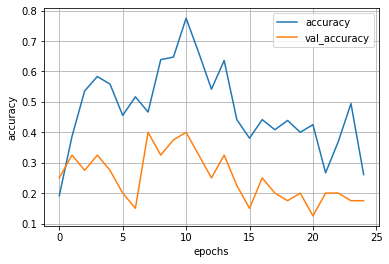

In [19]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_DNN.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

## Evaluate the model

In [21]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_DNN.evaluate(X_test,y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss, test_accuracy))

4/4 [==============================] - 0s 23ms/step - loss: 1.6759 - accuracy: 0.2100
Test-loss: 1.675871, Test-accuracy: 0.210000
